In [11]:
import time
import random
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from itertools import combinations
from IPython.display import clear_output

In [12]:
# read cvs pick_data file
pick_data = pd.read_csv("pick_data_upload_2.csv")

/var/folders/t0/076wyzj12cgctpjh4_l2656m0000gn/T/ipykernel_1425/3130211619.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  pick_data = pd.read_csv("pick_data_upload_2.csv")


In [13]:
pick_data

,product_id,category,source_order_id,order_number,position_in_order,pick_volume,quantity_unit,date_time,flag_6,flag_7
0,7,AKL,48,20188105006,2,4,St,2018-01-16 03:05:21,0,0
1,10,HRL,48,20188197426,1,24,St,2018-01-30 10:52:31,0,0
2,10,HRL,48,20188197426,1,24,St,2018-01-30 10:58:08,0,0
3,10,HRL,48,20188197426,1,12,St,2018-01-30 12:03:18,0,0
4,10,HRL,48,20188197426,1,24,St,2018-01-30 12:06:39,0,0
...,...,...,...,...,...,...,...,...,...,...
10118249,Z97984,SHL,48,20202687649,1,2,St,2020-03-18 01:24:24,0,0
10118250,Z97984,SHL,48,20202872645,6,1,St,2020-04-22 23:28:20,0,0
10118251,Z97984,SHL,48,20202983837,5,1,St,2020-05-12 22:58:52,0,0
10118252,Z97984,SHL,48,20201001119,4,1,St,2020-05-14 17:48:22,0,0


In [4]:
# rename columns of data to match schema
# pick_data.columns = ["product_id", "category", "source_order_id", "order_number", "position_in_order", "pick_volume", "quantity_unit", "date_time"]

In [14]:
# assign data types to pick_data to match schema
pick_data["product_id"] = pick_data["product_id"].astype(str)
pick_data["category"] = pick_data["category"].astype(str)
pick_data["source_order_id"] = pick_data["source_order_id"].astype(str)
pick_data["order_number"] = pick_data["order_number"].astype(str)
pick_data["position_in_order"] = pick_data["position_in_order"].astype(int)
pick_data["pick_volume"] = pick_data["pick_volume"].astype(int)
pick_data["quantity_unit"] = pick_data["quantity_unit"].astype(str)
pick_data["date_time"] = pd.to_datetime(pick_data["date_time"])

In [15]:
pick_data = pick_data[(pick_data['flag_6'] == 0) & (pick_data['flag_6'] == 0)]

## kpi for pick data

##### Pick/warehouse section/origin/time(3years->2018,2019,2020 collectively) 

/var/folders/t0/076wyzj12cgctpjh4_l2656m0000gn/T/ipykernel_1425/3635418597.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_time'] = pd.to_datetime(df['date_time'])
/var/folders/t0/076wyzj12cgctpjh4_l2656m0000gn/T/ipykernel_1425/3635418597.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['date_time'].dt.year
/var/folders/t0/076wyzj12cgctpjh4_l2656m0000gn/T/ipykernel_1425/3635418597.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same eff

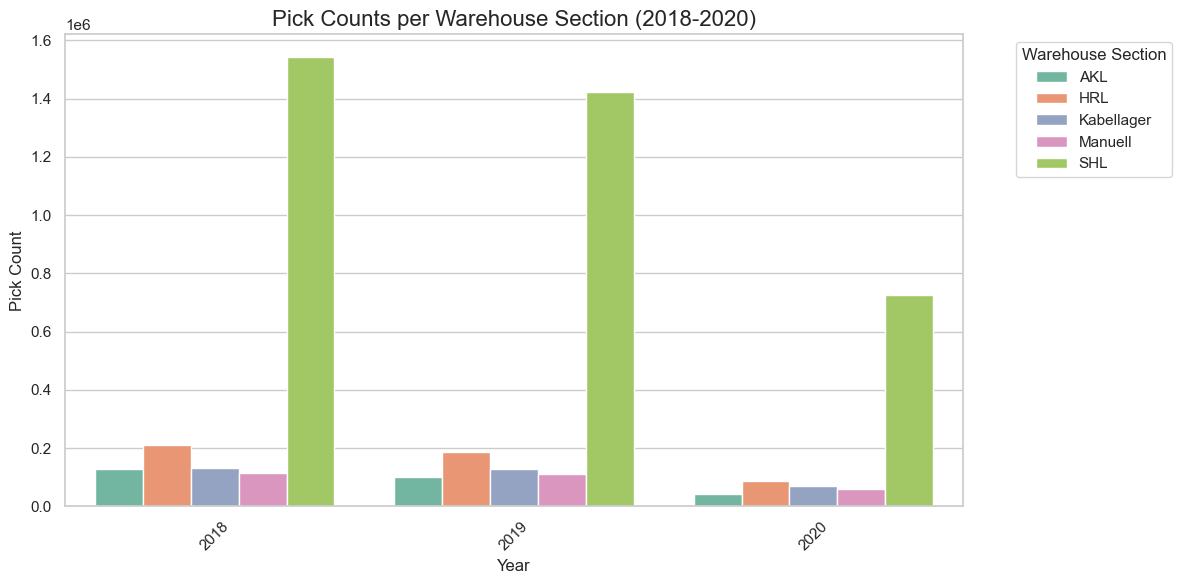

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pick_data

df['date_time'] = pd.to_datetime(df['date_time'])

df['year'] = df['date_time'].dt.year

df_filtered = df[df['year'].isin([2018, 2019, 2020])]

kpi_data = df_filtered.groupby(['category', 'source_order_id', 'year']).size().reset_index(name='pick_count')

plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

sns.barplot(x="year", y="pick_count", hue="category", data=kpi_data, 
            palette="Set2", ci=None, dodge=True)

plt.title('Pick Counts per Warehouse Section (2018-2020)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Pick Count', fontsize=12)
plt.legend(title='Warehouse Section', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Below is code with stacked line plot as per instructions


/var/folders/t0/076wyzj12cgctpjh4_l2656m0000gn/T/ipykernel_1425/215578314.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_time'] = pd.to_datetime(df['date_time'])
/var/folders/t0/076wyzj12cgctpjh4_l2656m0000gn/T/ipykernel_1425/215578314.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['week'] = df['date_time'].dt.isocalendar().week
/var/folders/t0/076wyzj12cgctpjh4_l2656m0000gn/T/ipykernel_1425/215578314.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

<Figure size 1400x700 with 0 Axes>

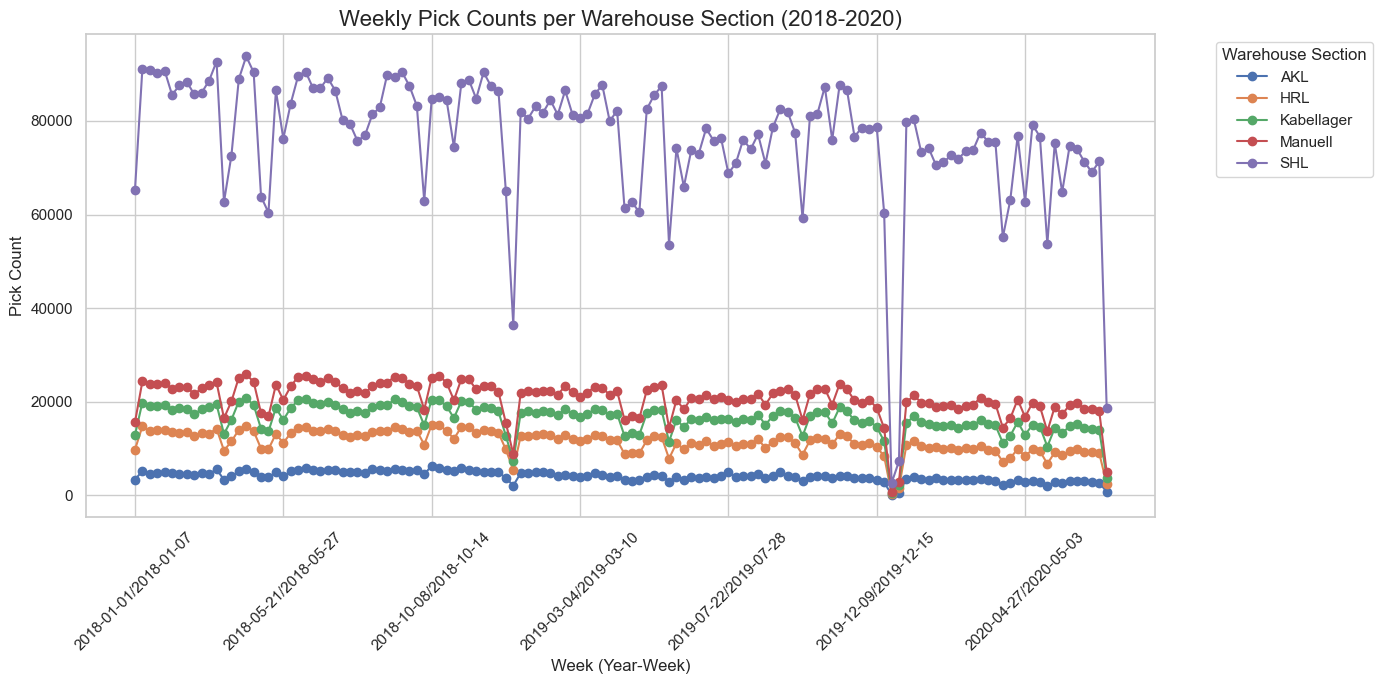

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df=pick_data
import pandas as pd
import matplotlib.pyplot as plt

df['date_time'] = pd.to_datetime(df['date_time'])

df['week'] = df['date_time'].dt.isocalendar().week
df['year'] = df['date_time'].dt.year

df['year_week'] = df['date_time'].dt.to_period('W').astype(str)

df_filtered = df[df['year'].isin([2018, 2019, 2020])]

kpi_data = df_filtered.groupby(['category', 'year_week']).size().reset_index(name='pick_count')

kpi_pivot = kpi_data.pivot(index='year_week', columns='category', values='pick_count').fillna(0)

plt.figure(figsize=(14, 7))
kpi_pivot.plot(kind='line', stacked=True, marker='o', figsize=(14, 7))

plt.title('Weekly Pick Counts per Warehouse Section (2018-2020)', fontsize=16)
plt.xlabel('Week (Year-Week)', fontsize=12)
plt.ylabel('Pick Count', fontsize=12)
plt.legend(title='Warehouse Section', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

/var/folders/t0/076wyzj12cgctpjh4_l2656m0000gn/T/ipykernel_1425/2707807186.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_time'] = pd.to_datetime(df['date_time'])
/var/folders/t0/076wyzj12cgctpjh4_l2656m0000gn/T/ipykernel_1425/2707807186.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['date_time'].dt.year
/var/folders/t0/076wyzj12cgctpjh4_l2656m0000gn/T/ipykernel_1425/2707807186.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

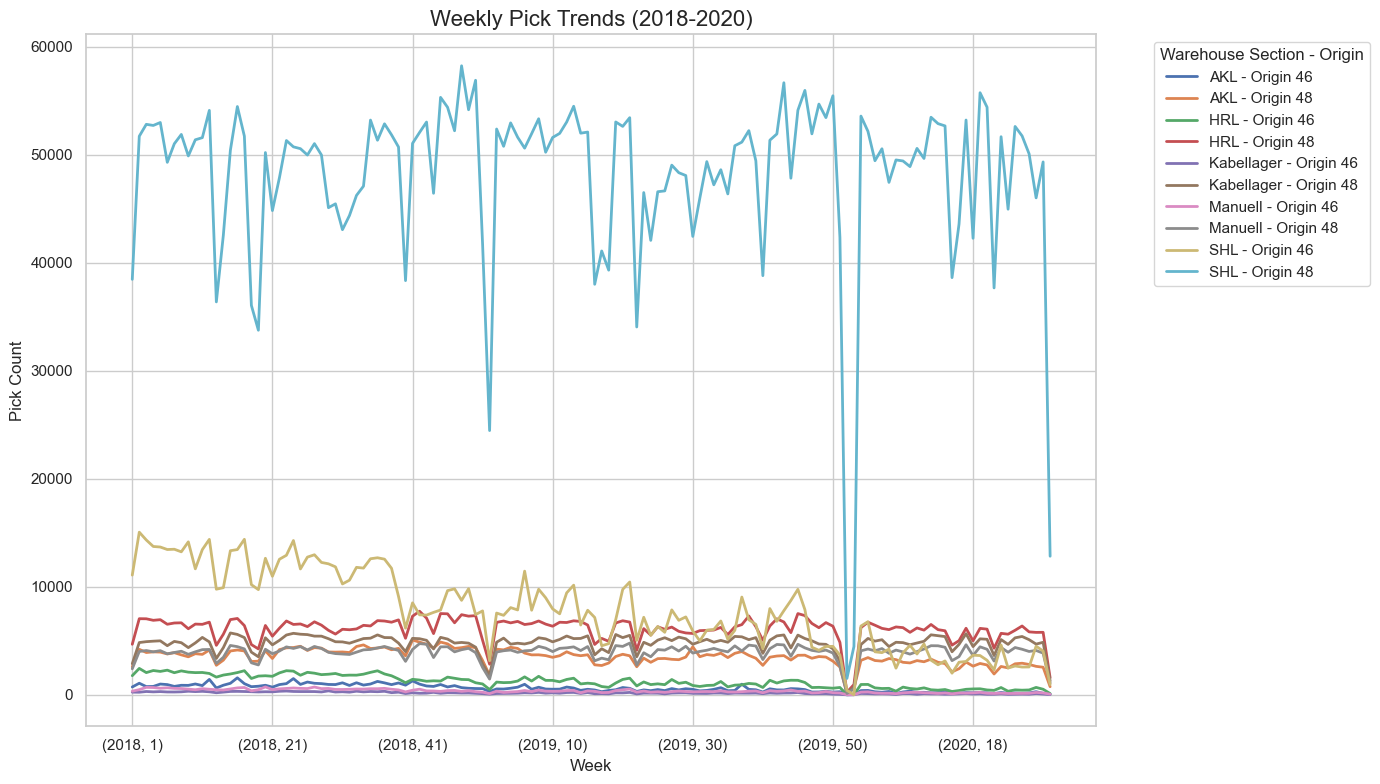

In [9]:
import pandas as pd
import matplotlib.pyplot as plt


df['date_time'] = pd.to_datetime(df['date_time'])

df['year'] = df['date_time'].dt.year
df['week'] = df['date_time'].dt.isocalendar().week

df = df[df['year'].isin([2018, 2019, 2020])]

df_grouped = df.groupby(['year', 'week', 'category', 'source_order_id']).size().reset_index(name='pick_count')

df_pivot = df_grouped.pivot_table(index=['year', 'week'], columns=['category', 'source_order_id'], values='pick_count', aggfunc='sum').fillna(0)

plt.figure(figsize=(14, 8))

for column in df_pivot.columns:
    df_pivot[column].plot(label=f'{column[0]} - Origin {column[1]}', lw=2)

plt.title('Weekly Pick Trends (2018-2020)', fontsize=16)
plt.xlabel('Week', fontsize=12)
plt.ylabel('Pick Count', fontsize=12)
plt.legend(title="Warehouse Section - Origin", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

plt.show()


In [10]:
import pandas as pd
import plotly.express as px


df['date_time'] = pd.to_datetime(df['date_time'])

df['year'] = df['date_time'].dt.year
df['week'] = df['date_time'].dt.isocalendar().week

df_picks = df.groupby(['order_number', 'category', 'year', 'week']).size().reset_index(name='picks')

fig = px.line(df_picks, 
              x='week', 
              y='picks', 
              color='category', 
              line_group='order_number', 
              title='Number of Picks per Order by Warehouse Section and Time (Weekly)',
              labels={'week': 'Week of Year', 'picks': 'Number of Picks'},
              facet_col='year', 
              facet_col_wrap=3)  

fig.update_layout(
    hovermode='x unified',  
    xaxis_title='Week of Year',
    yaxis_title='Number of Picks'
)

fig.show()


ModuleNotFoundError: No module named 'plotly'

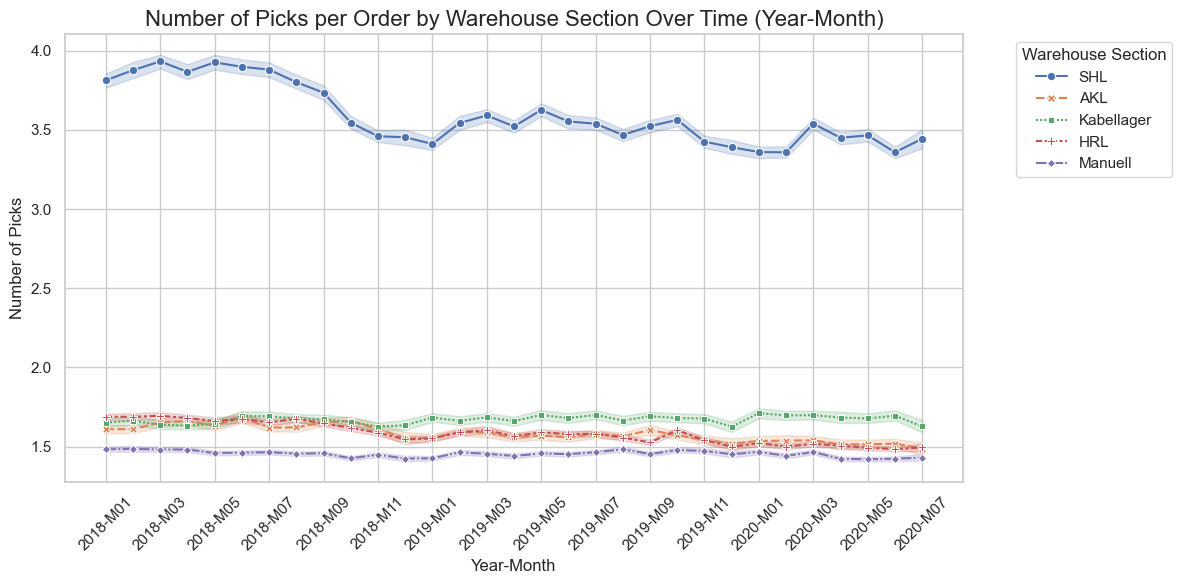

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df['date_time'] = pd.to_datetime(df['date_time'])

df['year'] = df['date_time'].dt.year
df['month'] = df['date_time'].dt.month

order_picks = df.groupby(['order_number', 'category', 'year', 'month']).size().reset_index(name='pick_count')

order_picks['year_month'] = order_picks['year'].astype(str) + '-M' + order_picks['month'].astype(str).str.zfill(2)

order_picks = order_picks.sort_values(by=['year', 'month']).reset_index(drop=True)

plt.figure(figsize=(12, 6))
sns.lineplot(data=order_picks, x='year_month', y='pick_count', hue='category', style='category', markers=True)

x_labels = order_picks['year_month'].unique()
x_tick_positions = range(0, len(x_labels), 2)  # Show every second label
plt.xticks(ticks=x_tick_positions, labels=x_labels[::2], rotation=45)

plt.title('Number of Picks per Order by Warehouse Section Over Time (Year-Month)', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Number of Picks', fontsize=12)
plt.legend(title='Warehouse Section', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

plt.show()

below is the logarithmic scale 

/var/folders/t0/076wyzj12cgctpjh4_l2656m0000gn/T/ipykernel_1425/1369966626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_time'] = pd.to_datetime(df['date_time'])
/var/folders/t0/076wyzj12cgctpjh4_l2656m0000gn/T/ipykernel_1425/1369966626.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['date_time'].dt.year
/var/folders/t0/076wyzj12cgctpjh4_l2656m0000gn/T/ipykernel_1425/1369966626.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

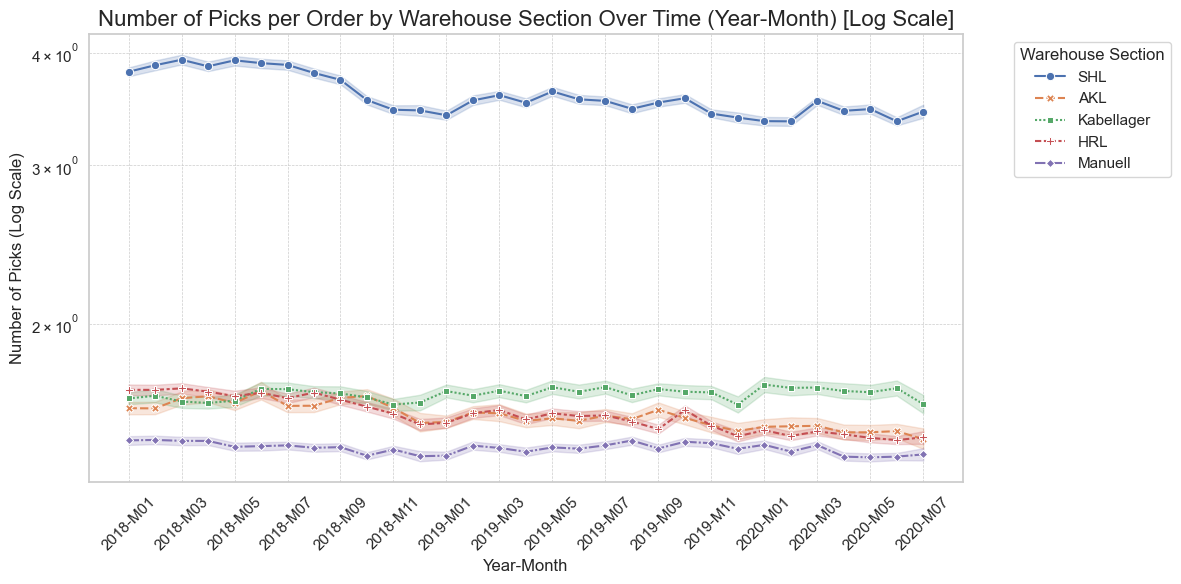

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pick_data


df['date_time'] = pd.to_datetime(df['date_time'])

df['year'] = df['date_time'].dt.year
df['month'] = df['date_time'].dt.month

order_picks = df.groupby(['order_number', 'category', 'year', 'month']).size().reset_index(name='pick_count')

order_picks['year_month'] = order_picks['year'].astype(str) + '-M' + order_picks['month'].astype(str).str.zfill(2)

order_picks = order_picks.sort_values(by=['year', 'month']).reset_index(drop=True)


plt.figure(figsize=(12, 6))
sns.lineplot(data=order_picks, x='year_month', y='pick_count', hue='category', style='category', markers=True)

plt.yscale('log')

x_labels = order_picks['year_month'].unique()
x_tick_positions = range(0, len(x_labels), 2)  # Show every second label
plt.xticks(ticks=x_tick_positions, labels=x_labels[::2], rotation=45)

plt.title('Number of Picks per Order by Warehouse Section Over Time (Year-Month) [Log Scale]', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Number of Picks (Log Scale)', fontsize=12)
plt.legend(title='Warehouse Section', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Add gridlines for clarity on the log scale
plt.tight_layout()

plt.show()

the below graph is with normalized data


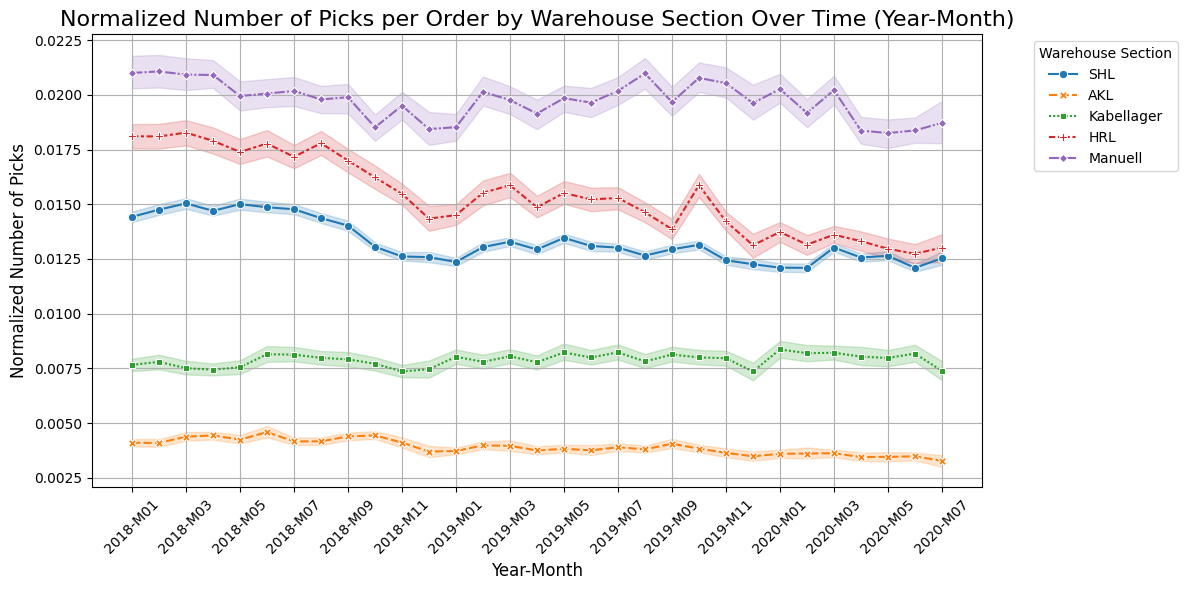

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pick_data




df['date_time'] = pd.to_datetime(df['date_time'])

df['year'] = df['date_time'].dt.year
df['month'] = df['date_time'].dt.month

order_picks = df.groupby(['order_number', 'category', 'year', 'month']).size().reset_index(name='pick_count')

order_picks['year_month'] = order_picks['year'].astype(str) + '-M' + order_picks['month'].astype(str).str.zfill(2)

order_picks['normalized_pick_count'] = order_picks.groupby('category')['pick_count'].transform(
    lambda x: (x - x.min()) / (x.max() - x.min())
)

order_picks = order_picks.sort_values(by=['year', 'month']).reset_index(drop=True)


plt.figure(figsize=(12, 6))
sns.lineplot(data=order_picks, x='year_month', y='normalized_pick_count', hue='category', style='category', markers=True)

x_labels = order_picks['year_month'].unique()
x_tick_positions = range(0, len(x_labels), 2)  # Show every second label
plt.xticks(ticks=x_tick_positions, labels=x_labels[::2], rotation=45)

plt.title('Normalized Number of Picks per Order by Warehouse Section Over Time (Year-Month)', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Normalized Number of Picks', fontsize=12)
plt.legend(title='Warehouse Section', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

plt.show()

the graph below was created with a secondary axis


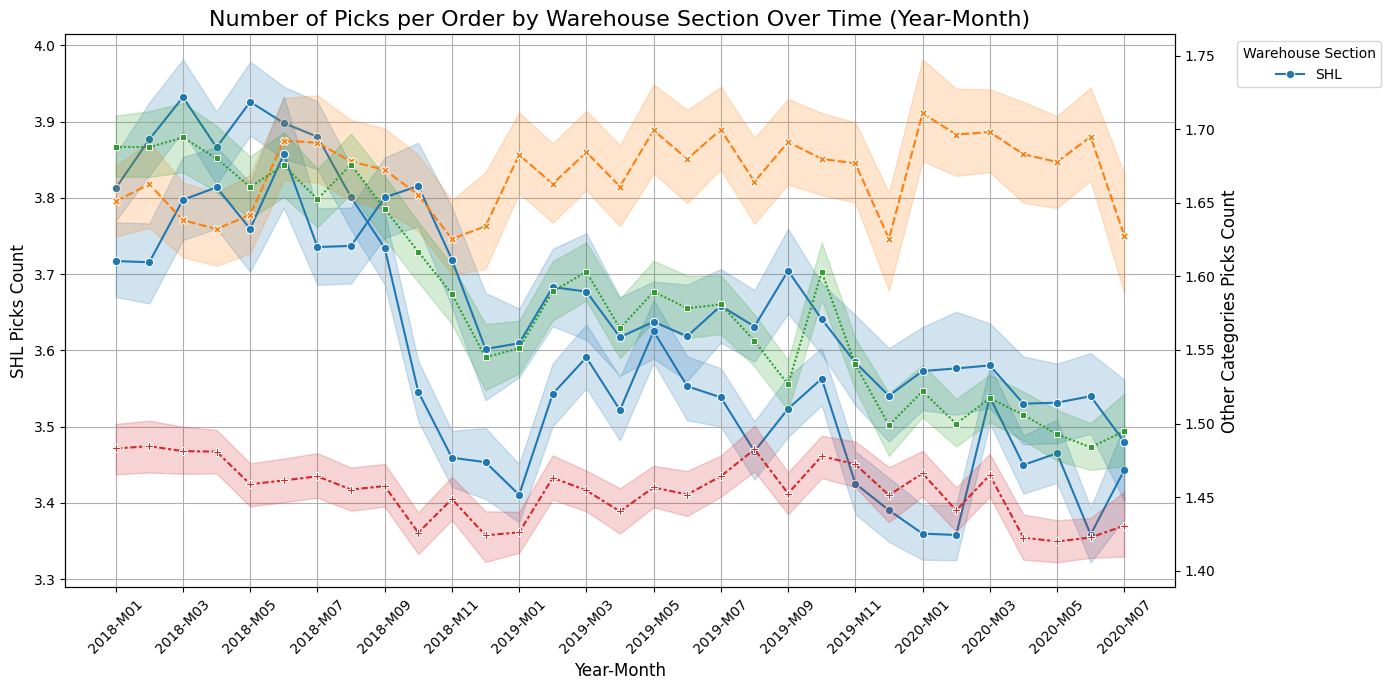

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pick_data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df['date_time'] = pd.to_datetime(df['date_time'])

df['year'] = df['date_time'].dt.year
df['month'] = df['date_time'].dt.month


order_picks = df.groupby(['order_number', 'category', 'year', 'month']).size().reset_index(name='pick_count')

order_picks['year_month'] = order_picks['year'].astype(str) + '-M' + order_picks['month'].astype(str).str.zfill(2)

order_picks = order_picks.sort_values(by=['year', 'month']).reset_index(drop=True)

shl_data = order_picks[order_picks['category'] == 'SHL']
other_data = order_picks[order_picks['category'] != 'SHL']

fig, ax1 = plt.subplots(figsize=(14, 7))

sns.lineplot(data=shl_data, x='year_month', y='pick_count', hue='category', style='category', markers=True, ax=ax1)
ax1.set_ylabel('SHL Picks Count', fontsize=12)
ax1.set_xlabel('Year-Month', fontsize=12)
ax1.set_xticks(range(0, len(order_picks['year_month'].unique()), 2))
ax1.set_xticklabels(order_picks['year_month'].unique()[::2], rotation=45)
ax1.set_title('Number of Picks per Order by Warehouse Section Over Time (Year-Month)', fontsize=16)
ax1.grid(True)

ax2 = ax1.twinx()

sns.lineplot(data=other_data, x='year_month', y='pick_count', hue='category', style='category', markers=True, ax=ax2, legend=False)
ax2.set_ylabel('Other Categories Picks Count', fontsize=12)

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, title='Warehouse Section', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

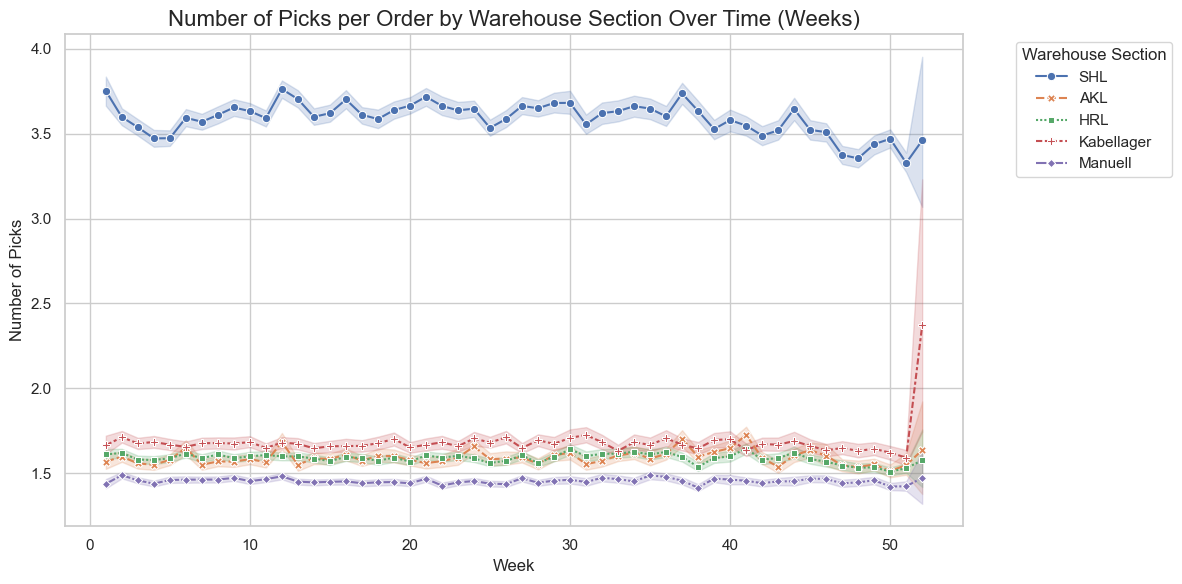

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df['date_time'] = pd.to_datetime(df['date_time'])

df['year'] = df['date_time'].dt.year
df['week'] = df['date_time'].dt.isocalendar().week


df_filtered = df[df['year'].isin([2018, 2019, 2020])]

order_picks = df_filtered.groupby(['order_number', 'category', 'year', 'week']).size().reset_index(name='pick_count')

plt.figure(figsize=(12, 6))
sns.lineplot(data=order_picks, x='week', y='pick_count', hue='category', style='category', markers=True)

plt.title('Number of Picks per Order by Warehouse Section Over Time (Weeks)', fontsize=16)
plt.xlabel('Week', fontsize=12)
plt.ylabel('Number of Picks', fontsize=12)
plt.legend(title='Warehouse Section', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

plt.show()



----

/var/folders/t0/076wyzj12cgctpjh4_l2656m0000gn/T/ipykernel_40832/1106821505.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['date_time'].dt.to_period('M')  # Extract the month


<Figure size 2000x1000 with 0 Axes>

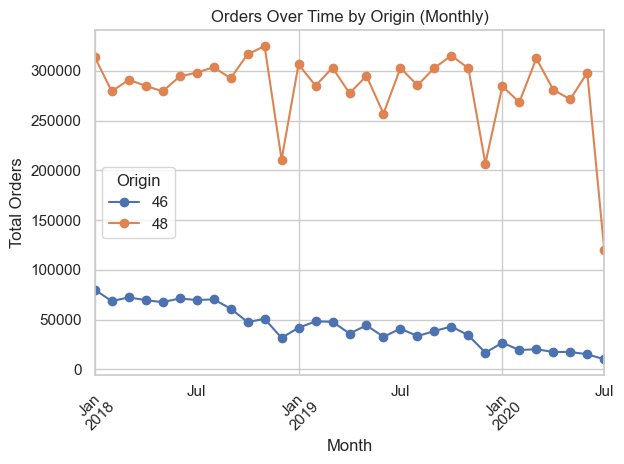

In [20]:
import matplotlib.pyplot as plt

df['month'] = df['date_time'].dt.to_period('M')  # Extract the month
df_grouped = df.groupby([df['month'], 'source_order_id'])['order_number'].count().reset_index()

df_pivot = df_grouped.pivot(index='month', columns='source_order_id', values='order_number')

plt.figure(figsize=(20, 10))
df_pivot.plot(kind='line', marker='o')
plt.title('Orders Over Time by Origin (Monthly)')
plt.xlabel('Month')
plt.ylabel('Total Orders')
plt.legend(title='Origin')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/t0/076wyzj12cgctpjh4_l2656m0000gn/T/ipykernel_40832/3235880299.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['date_time'].dt.to_period('M')  # Extract the month


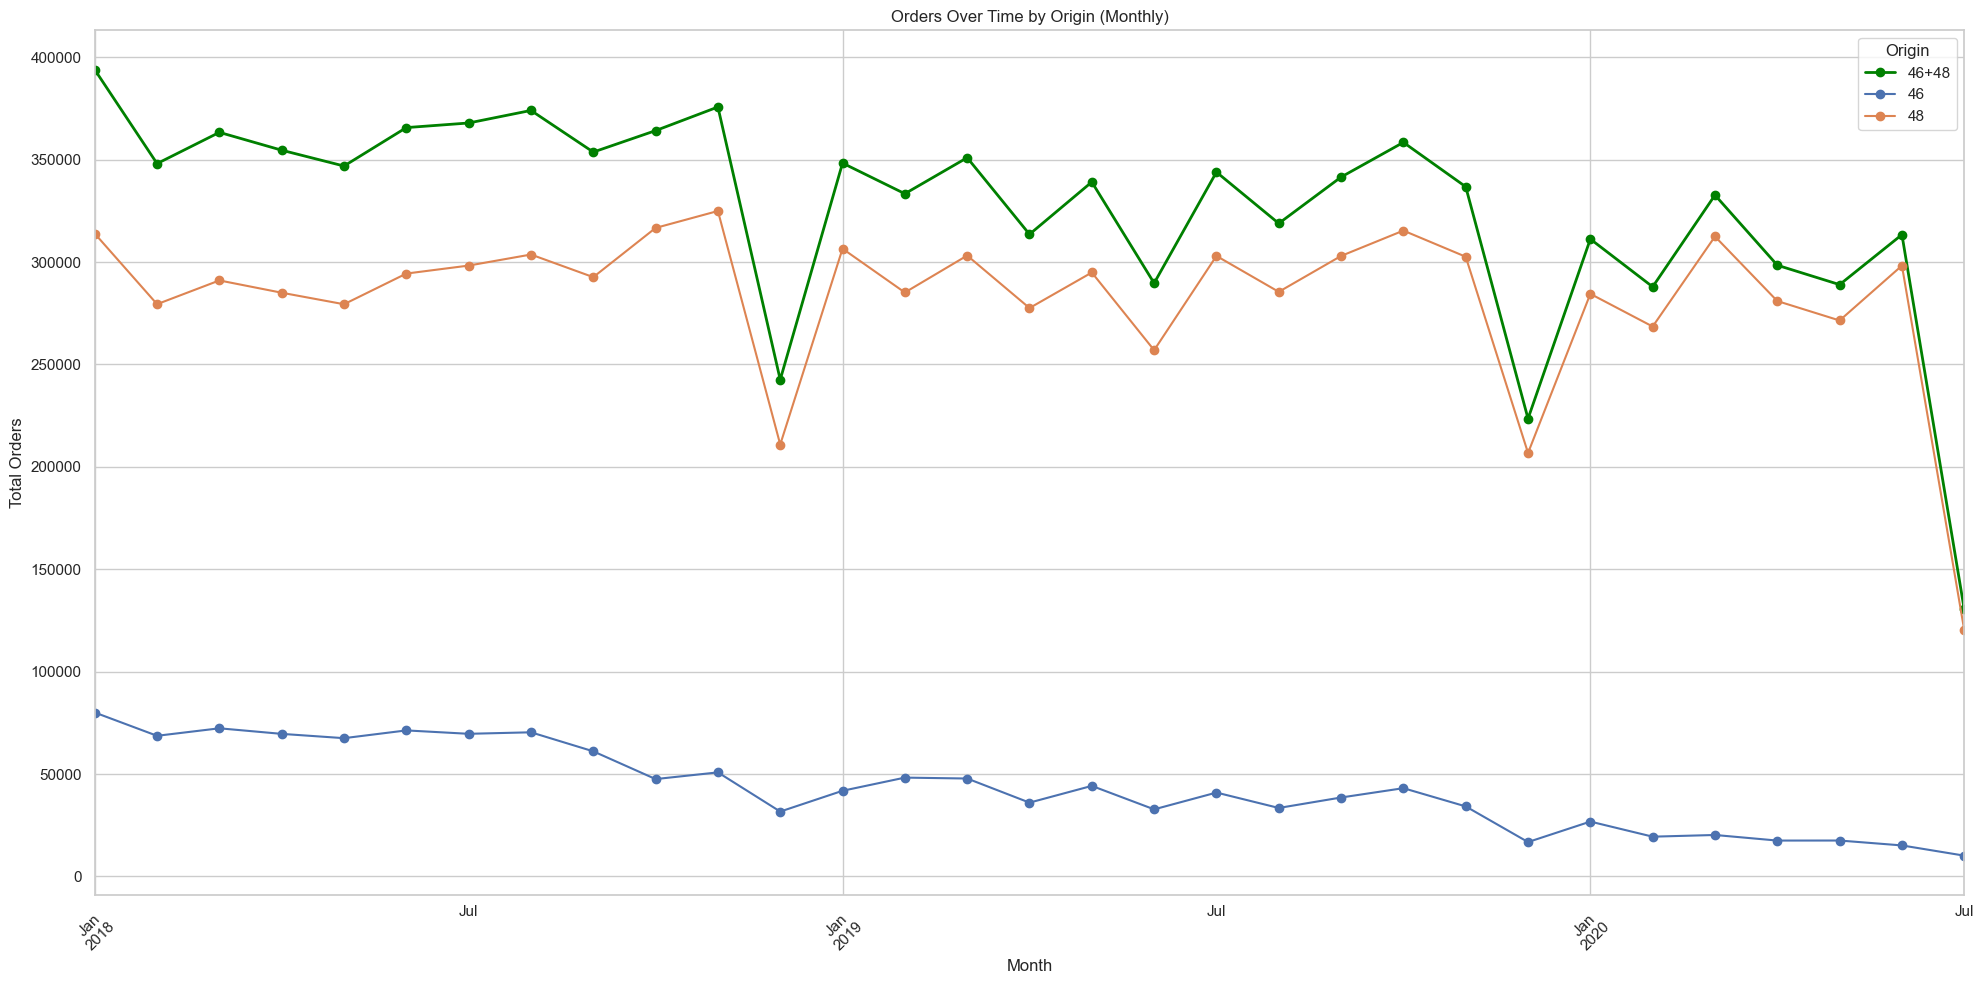

In [24]:
import matplotlib.pyplot as plt

df['month'] = df['date_time'].dt.to_period('M')  # Extract the month
df_grouped = df.groupby([df['month'], 'source_order_id'])['order_number'].count().reset_index()

df_pivot = df_grouped.pivot(index='month', columns='source_order_id', values='order_number')

df_pivot['46+48'] = df_pivot["46"].fillna(0) + df_pivot["48"].fillna(0)  

plt.figure(figsize=(20, 10))
df_pivot[['46+48']].plot(kind='line', marker='o', label='46+48', color='green', linewidth=2, ax=plt.gca())
df_pivot.drop(columns=['46+48'], errors='ignore').plot(kind='line', marker='o', ax=plt.gca())  # Other lines
plt.title('Orders Over Time by Origin (Monthly)')
plt.xlabel('Month')
plt.ylabel('Total Orders')
plt.legend(title='Origin')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/t0/076wyzj12cgctpjh4_l2656m0000gn/T/ipykernel_65290/2451653049.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month_year'] = df['date_time'].dt.to_period('M').dt.to_timestamp()


Unique Origins: ['48' '46']


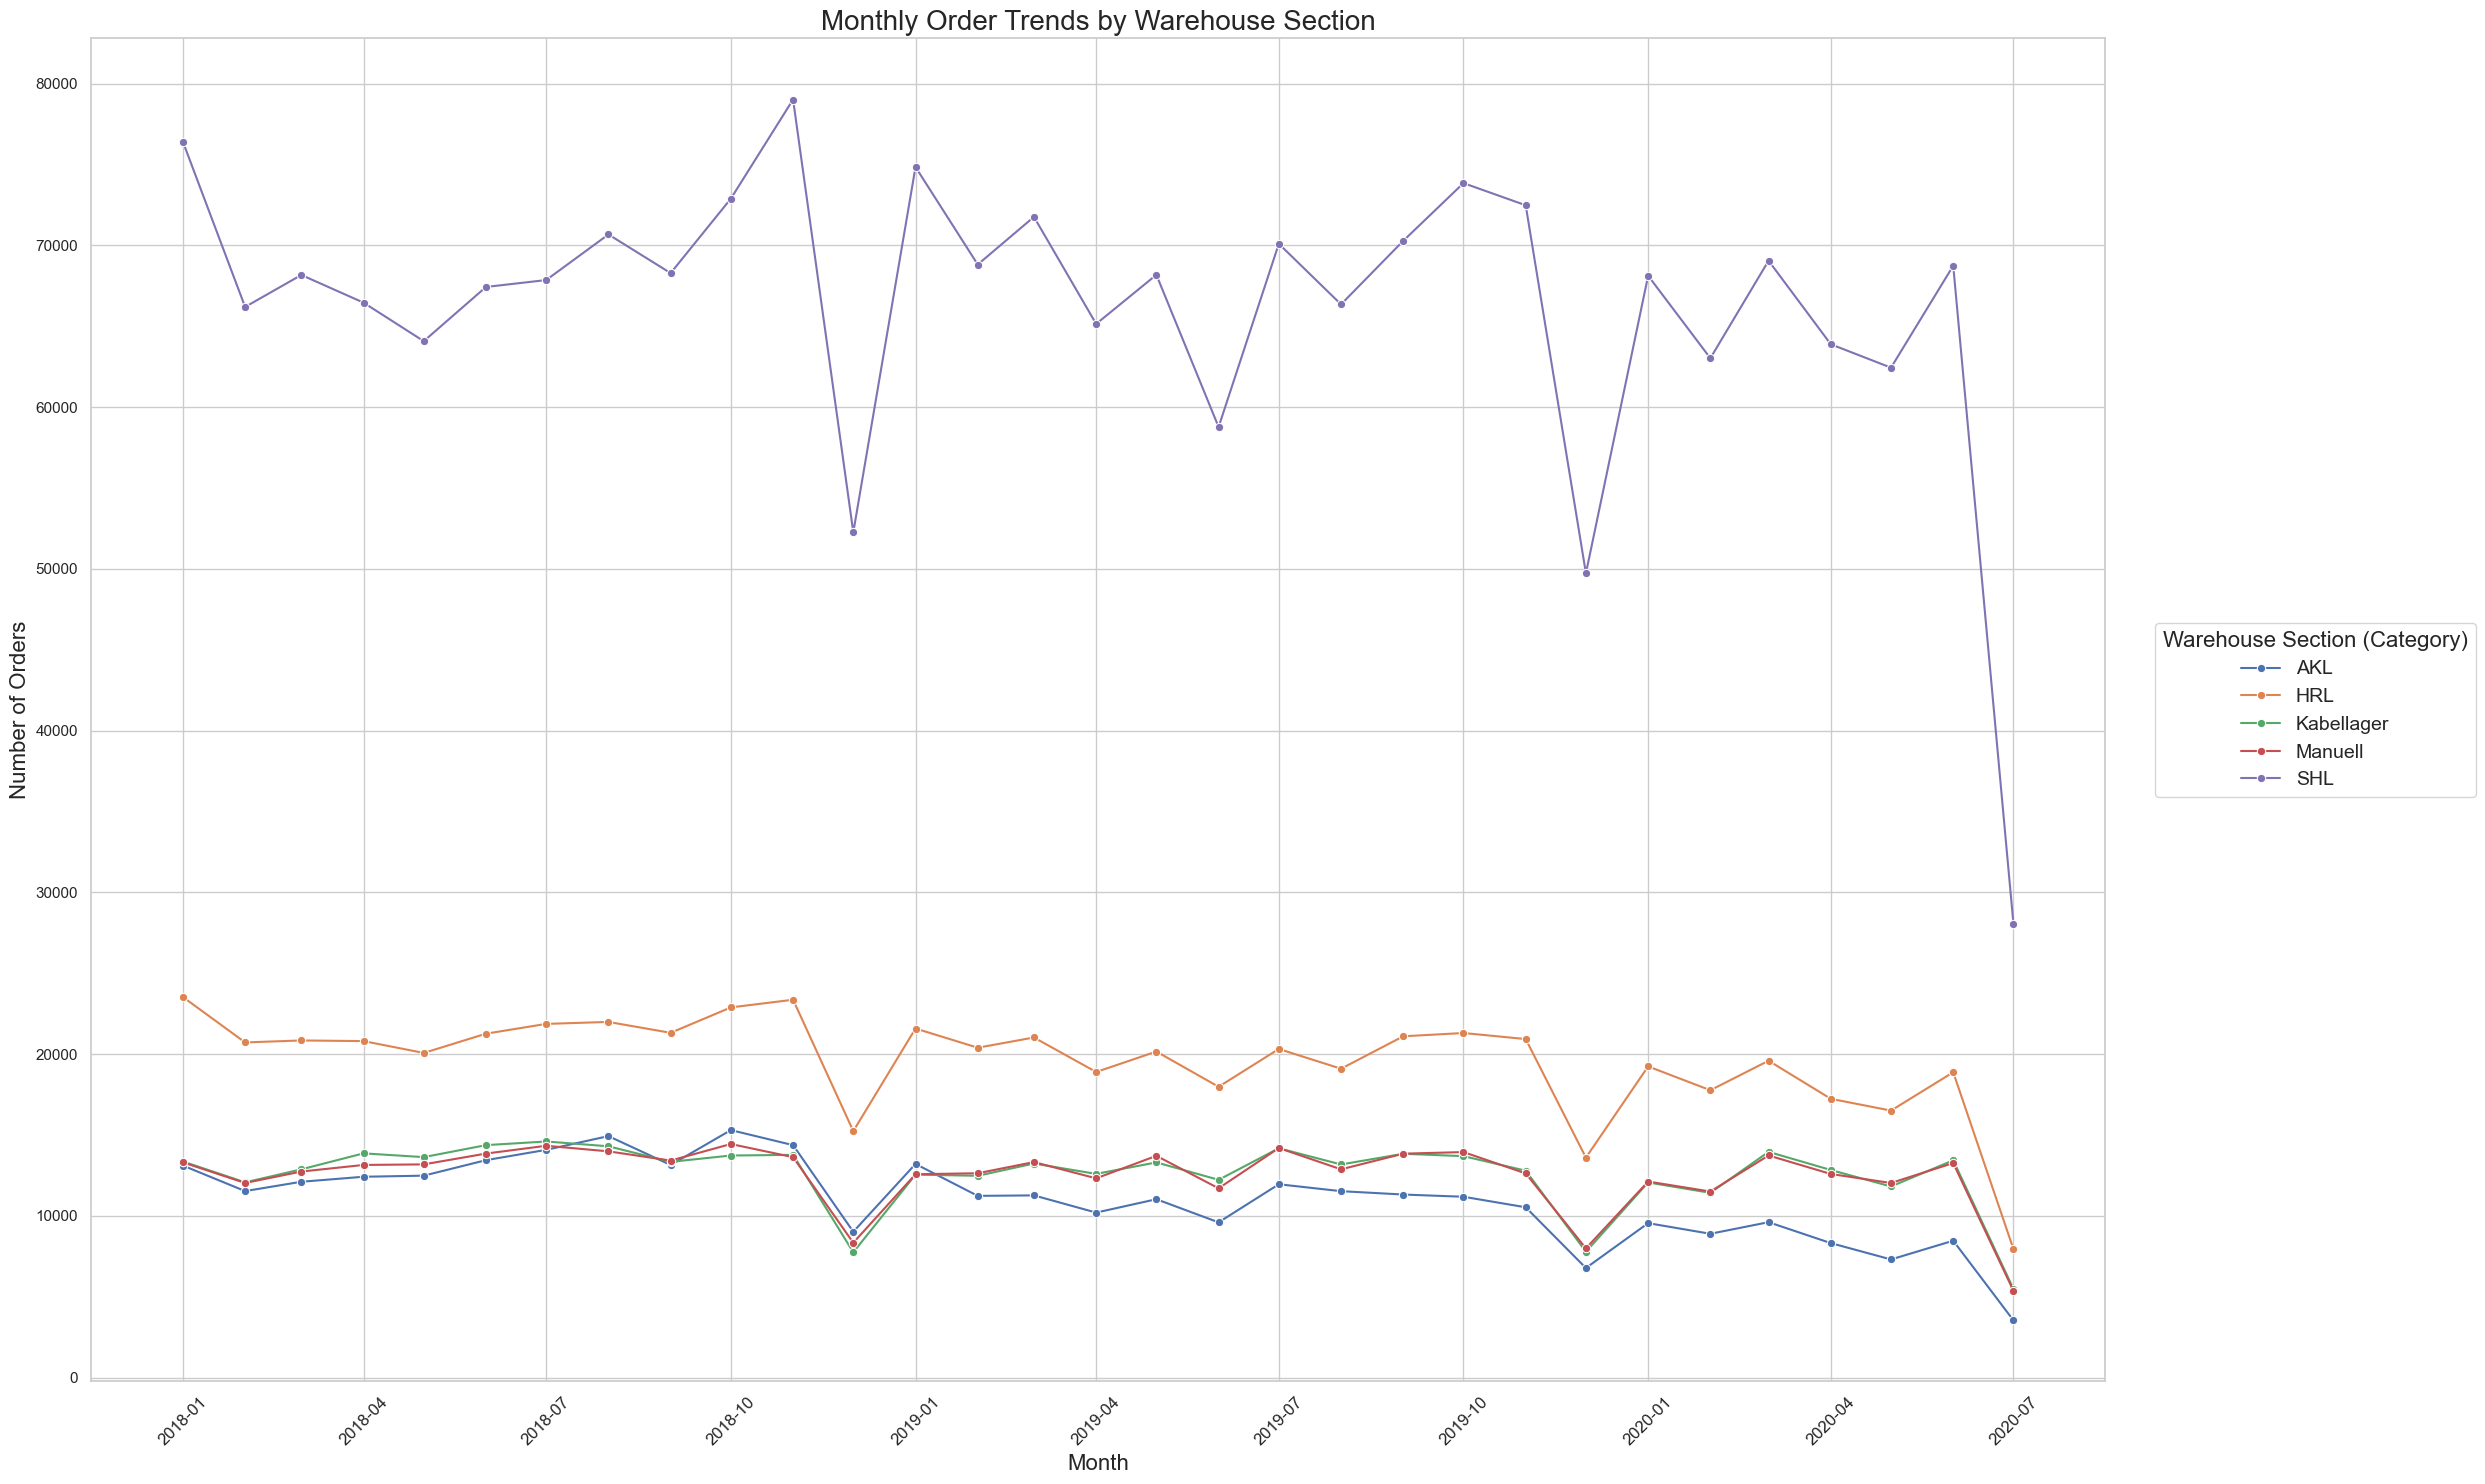

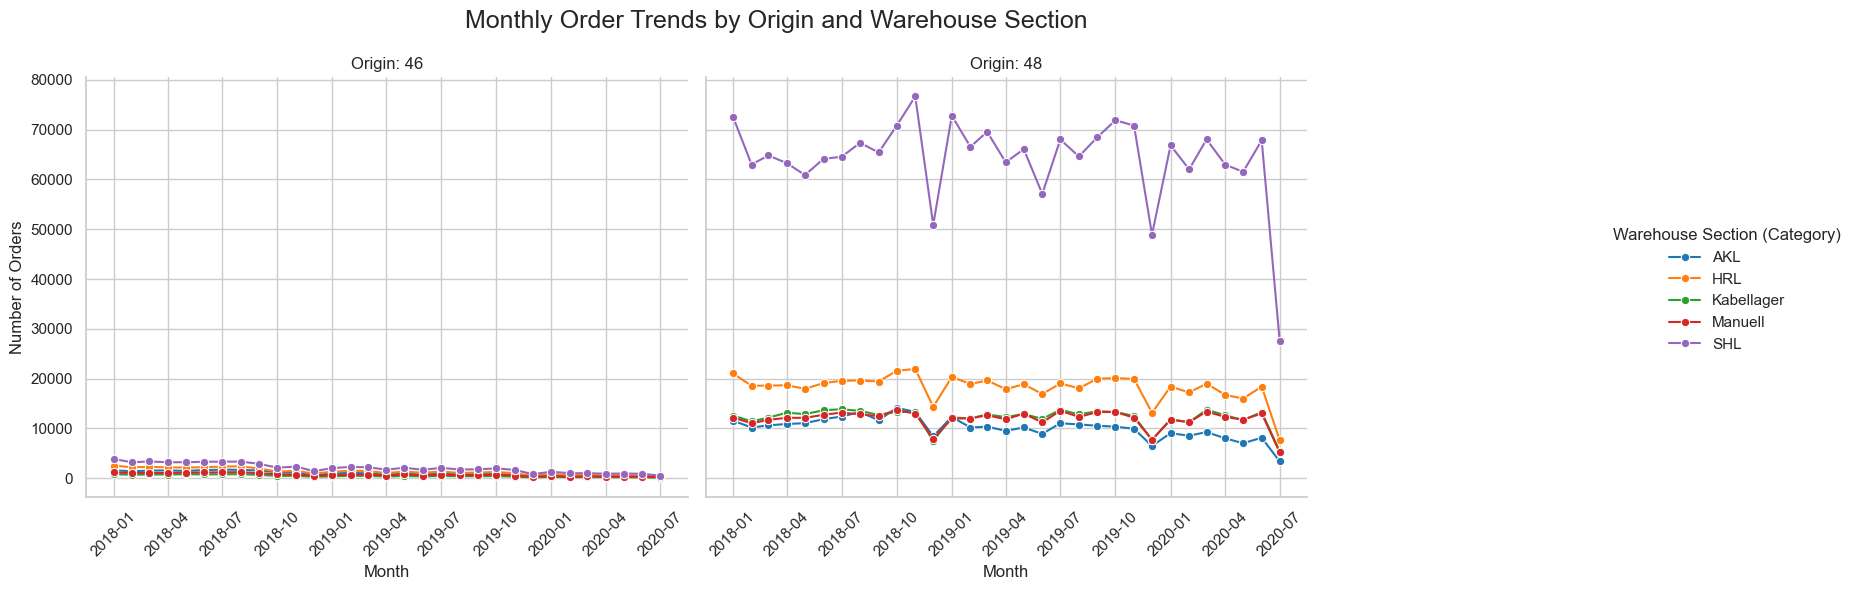

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pick_data

df['month_year'] = df['date_time'].dt.to_period('M').dt.to_timestamp()

unique_origins = df['source_order_id'].unique()
print("Unique Origins:", unique_origins)

orders_by_origin = df.groupby(['month_year', 'source_order_id'])['order_number'].nunique().reset_index()
orders_by_origin.rename(columns={'order_number': 'order_count'}, inplace=True)

orders_by_category = df.groupby(['month_year', 'category'])['order_number'].nunique().reset_index()
orders_by_category.rename(columns={'order_number': 'order_count'}, inplace=True)

orders_origin_category = df.groupby(['month_year', 'source_order_id', 'category'])['order_number'].nunique().reset_index()
orders_origin_category.rename(columns={'order_number': 'order_count'}, inplace=True)

plt.figure(figsize=(25, 15))
sns.lineplot(data=orders_by_category, x='month_year', y='order_count', hue='category', marker='o')

plt.title('Monthly Order Trends by Warehouse Section', fontsize=20)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Number of Orders', fontsize=16)
plt.legend(title='Warehouse Section (Category)', bbox_to_anchor=(1.02, 0.5), loc='center left', fontsize=14, title_fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

g = sns.FacetGrid(orders_origin_category, col='source_order_id', hue='category', height=6, aspect=1.2, palette='tab10')
g.map(sns.lineplot, 'month_year', 'order_count', marker='o').add_legend()

g._legend.set_bbox_to_anchor((1.02, 0.5))
g._legend.set_title("Warehouse Section (Category)")
g._legend.set_frame_on(False)
g._legend.set_loc("center left")

g.set_titles('Origin: {col_name}')
g.set_axis_labels('Month', 'Number of Orders')
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

plt.subplots_adjust(top=0.85)
g.fig.suptitle('Monthly Order Trends by Origin and Warehouse Section', fontsize=18)
plt.tight_layout(rect=[0, 0, 0.85, 1])  
plt.show()

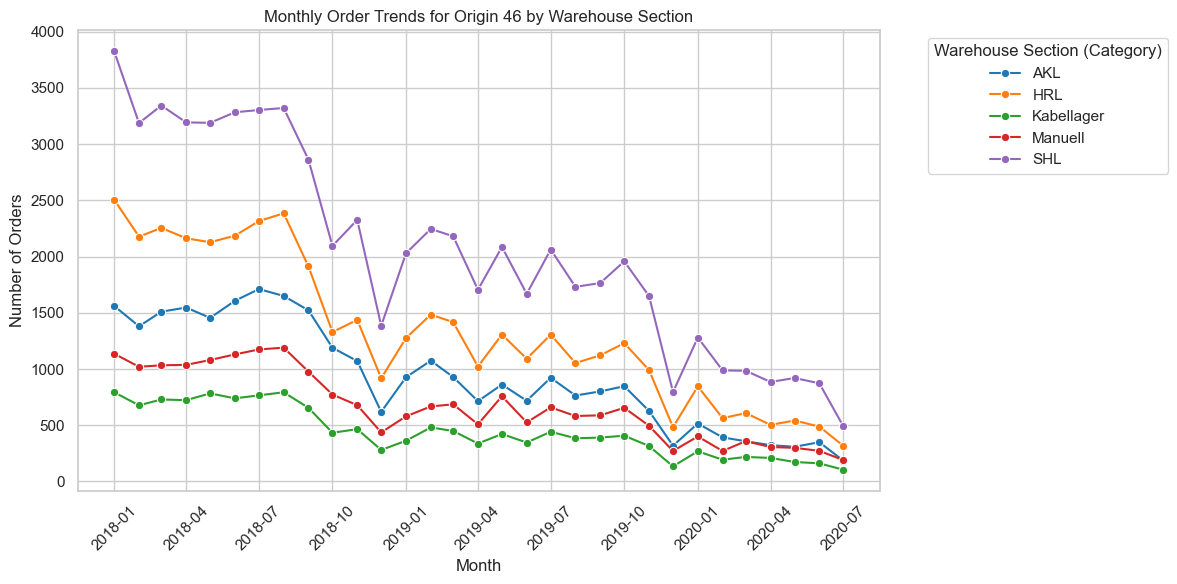

In [31]:

filtered_data = orders_origin_category[orders_origin_category['source_order_id'] == "46"]

if filtered_data.empty:
    print("No data available for source_order_id = 46.")
else:
    plt.figure(figsize=(12, 6))
    
    sns.lineplot(
        data=filtered_data,
        x='month_year',
        y='order_count',
        hue='category',
        marker='o',
        palette='tab10'
    )
    
    plt.title('Monthly Order Trends for Origin 46 by Warehouse Section')
    plt.xlabel('Month')
    plt.ylabel('Number of Orders')
    plt.legend(title='Warehouse Section (Category)', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    
    plt.show()

In [2]:

df = pick_data

df['date_time'] = pd.to_datetime(df['date_time'])
df['year_week'] = df['date_time'].dt.to_period('W')  # Group by year and week

kpi = df.groupby(['year_week', 'category', 'order_number'])['position_in_order'].nunique().reset_index()
kpi.rename(columns={'position_in_order': 'unique_positions'}, inplace=True)

kpi_aggregated = kpi.groupby(['year_week', 'category'])['unique_positions'].sum().reset_index()

pivot_kpi = kpi_aggregated.pivot(index='year_week', columns='category', values='unique_positions').fillna(0)

fig, ax = plt.subplots(figsize=(12, 6))
pivot_kpi.plot(kind='line', marker='o', ax=ax, linewidth=2)

ax.set_title('Unique Positions per Order from Warehouse Sections Over Time (Weekly)', fontsize=16, pad=15)
ax.set_xlabel('Year-Week', fontsize=12, labelpad=10)
ax.set_ylabel('Unique Positions', fontsize=12, labelpad=10)

ax.legend(title='Warehouse Section', loc='upper left', bbox_to_anchor=(1, 1), fontsize=10, title_fontsize=12)

ax.grid(visible=True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)

x_labels = pivot_kpi.index.strftime('%Y-W%U')
ax.set_xticks(range(len(x_labels))[::2])  
ax.set_xticklabels(x_labels[::2], rotation=45, ha='right', fontsize=10)


plt.tight_layout()

plt.show()

NameError: name 'pick_data' is not defined

/var/folders/t0/076wyzj12cgctpjh4_l2656m0000gn/T/ipykernel_21712/1475402919.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_time'] = pd.to_datetime(df['date_time'])
/var/folders/t0/076wyzj12cgctpjh4_l2656m0000gn/T/ipykernel_21712/1475402919.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['date_time'].dt.year
/var/folders/t0/076wyzj12cgctpjh4_l2656m0000gn/T/ipykernel_21712/1475402919.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

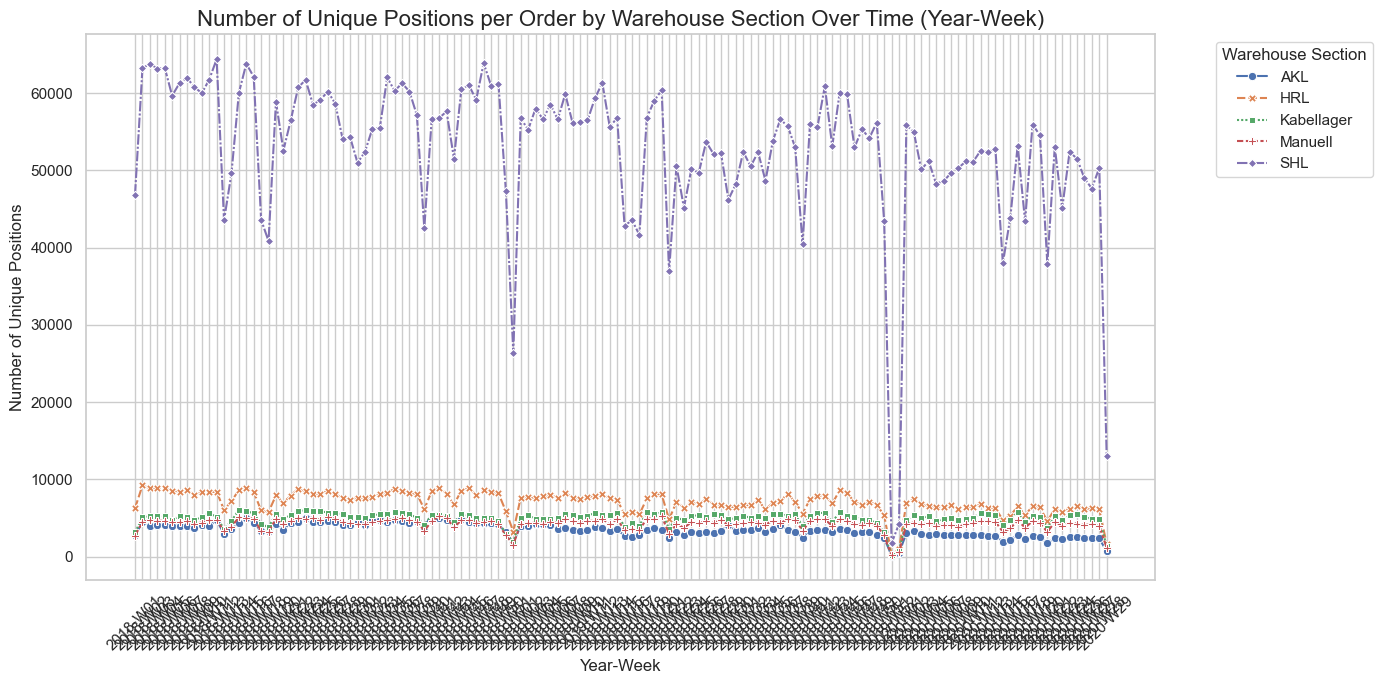

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pick_data

df['date_time'] = pd.to_datetime(df['date_time'])

df['year'] = df['date_time'].dt.year
df['week'] = df['date_time'].dt.isocalendar().week

df_filtered = df[df['year'].isin([2018, 2019, 2020])]

order_picks = (
    df_filtered
    .groupby(['order_number', 'category', 'year', 'week'])['position_in_order']
    .nunique()
    .reset_index(name="position_count")
)

weekly_picks = (
    order_picks
    .groupby(['year', 'week', 'category'])['position_count']
    .sum()
    .reset_index()
)

weekly_picks['year_week'] = weekly_picks['year'].astype(str) + '-W' + weekly_picks['week'].astype(str).str.zfill(2)


plt.figure(figsize=(14, 7))
sns.lineplot(data=weekly_picks, x='year_week', y='position_count', hue='category', style='category', markers=True)

plt.title('Number of Unique Positions per Order by Warehouse Section Over Time (Year-Week)', fontsize=16)
plt.xlabel('Year-Week', fontsize=12)
plt.ylabel('Number of Unique Positions', fontsize=12)
plt.legend(title='Warehouse Section', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [ ]:
import pandas as pd

df = pick_data

df['date_time'] = pd.to_datetime(df['date_time'])

order_number = 20188105006
unique_positions = len(df[df["order_number"] == order_number]["position_in_order"].unique())

print(f"Unique positions for order {order_number}: {unique_positions}")

unique_positions_all_orders = df.groupby("order_number")["position_in_order"].nunique().reset_index()
unique_positions_all_orders.rename(columns={"position_in_order": "unique_positions"}, inplace=True)

print(unique_positions_all_orders)

/var/folders/t0/076wyzj12cgctpjh4_l2656m0000gn/T/ipykernel_21712/532808274.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_time'] = pd.to_datetime(df['date_time'])
/var/folders/t0/076wyzj12cgctpjh4_l2656m0000gn/T/ipykernel_21712/532808274.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['date_time'].dt.year
/var/folders/t0/076wyzj12cgctpjh4_l2656m0000gn/T/ipykernel_21712/532808274.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

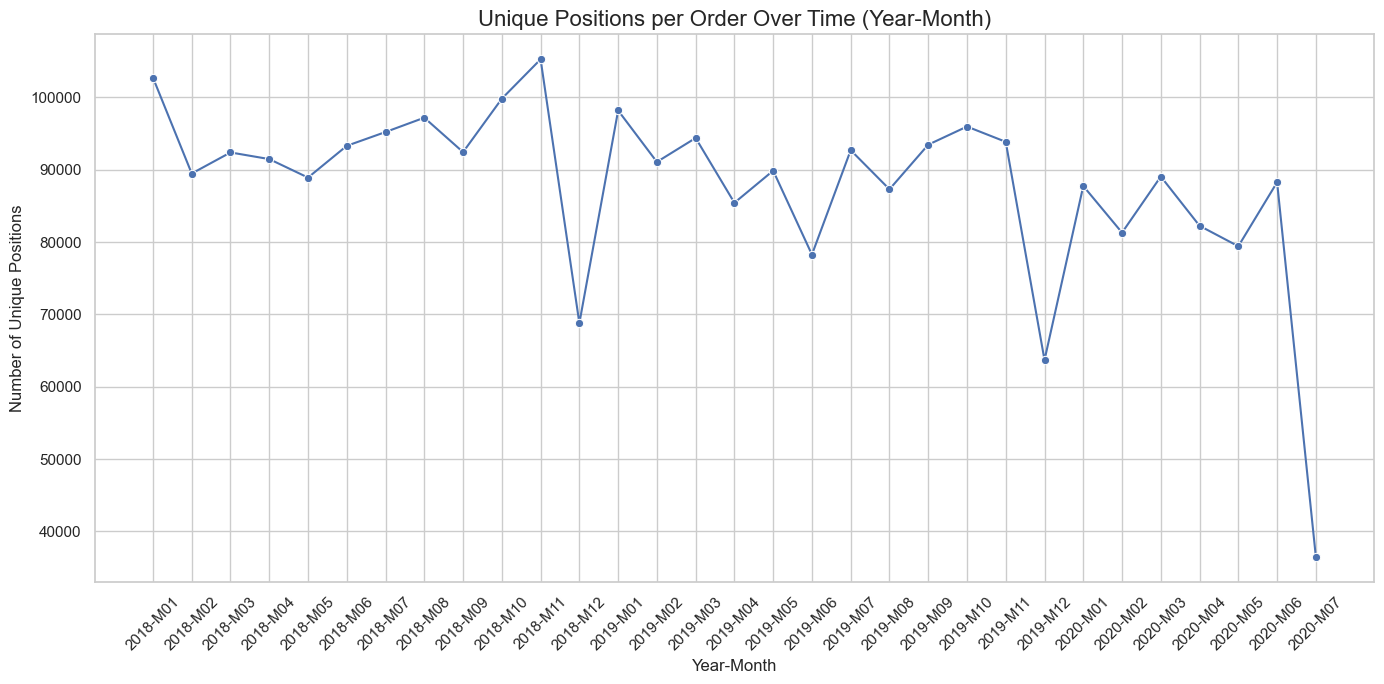

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pick_data

df['date_time'] = pd.to_datetime(df['date_time'])

df['year'] = df['date_time'].dt.year
df['month'] = df['date_time'].dt.month

unique_positions = (
    df.groupby(['order_number', 'year', 'month'])['position_in_order']
    .nunique()
    .reset_index(name='unique_positions')
)

monthly_positions = (
    unique_positions
    .groupby(['year', 'month'])['unique_positions']
    .count()
    .reset_index()
)

monthly_positions['year_month'] = (
    monthly_positions['year'].astype(str) + '-M' + monthly_positions['month'].astype(str).str.zfill(2)
)

plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_positions, x='year_month', y='unique_positions', marker='o')

plt.title('Unique Positions per Order Over Time (Year-Month)', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Number of Unique Positions', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

/var/folders/t0/076wyzj12cgctpjh4_l2656m0000gn/T/ipykernel_21712/1457782702.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_time'] = pd.to_datetime(df['date_time'])
/var/folders/t0/076wyzj12cgctpjh4_l2656m0000gn/T/ipykernel_21712/1457782702.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['date_time'].dt.year
/var/folders/t0/076wyzj12cgctpjh4_l2656m0000gn/T/ipykernel_21712/1457782702.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

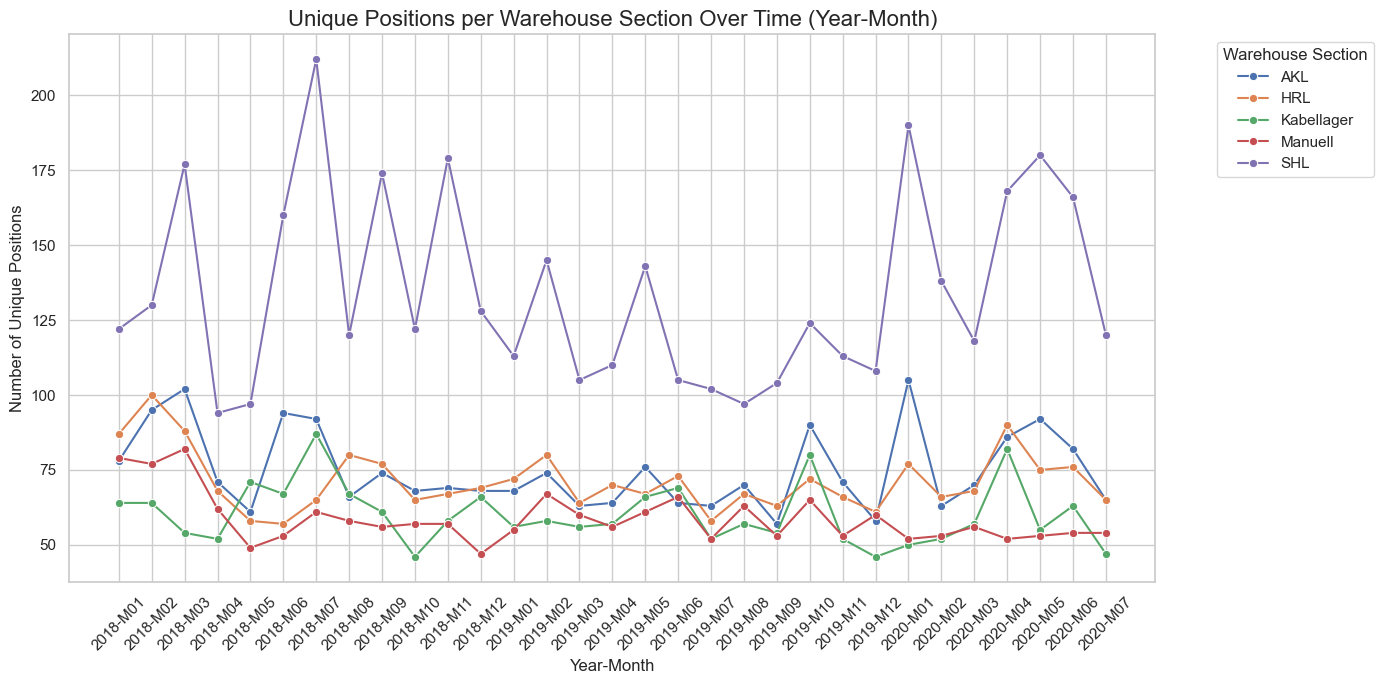

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pick_data

df['date_time'] = pd.to_datetime(df['date_time'])

df['year'] = df['date_time'].dt.year
df['month'] = df['date_time'].dt.month

unique_positions = (
    df.groupby(['category', 'year', 'month'])['position_in_order']
    .nunique()
    .reset_index(name='unique_positions')
)

unique_positions['year_month'] = (
    unique_positions['year'].astype(str) + '-M' + unique_positions['month'].astype(str).str.zfill(2)
)

plt.figure(figsize=(14, 7))
sns.lineplot(data=unique_positions, x='year_month', y='unique_positions', hue='category', marker='o')

plt.title('Unique Positions per Warehouse Section Over Time (Year-Month)', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Number of Unique Positions', fontsize=12)
plt.legend(title='Warehouse Section', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()